In [24]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

base_df = pd.read_csv("data_2_imputed.csv", index_col=0)
base_df_no_industry = base_df.drop(columns=["industry"])

In [25]:
# Normalize the data in base_df to get a new dataframe called norm_df
norm_df = (base_df_no_industry - base_df_no_industry.mean()) / base_df_no_industry.std()

In [26]:
norm_df

,revenues,ebit,employees,market_cap,outstanding_shares,stock_price
0,1.811580,0.665493,-0.779110,1.691879,-0.130296,0.319272
1,1.482894,1.882557,-0.776703,2.713172,-0.032706,-0.213498
2,1.408150,1.172443,-0.372820,1.403335,-0.153999,0.680096
3,1.088621,0.400277,0.228792,1.035059,-0.176256,1.121841
4,0.953427,0.644462,-0.383080,0.945197,-0.092174,-0.443540
...,...,...,...,...,...,...
744,-0.195398,0.310885,-0.897625,0.672198,0.056408,-0.915201
745,0.193887,0.448478,-0.032523,-0.380243,-0.205048,0.784608
746,0.066763,0.707421,0.257315,1.595774,-0.022653,-0.541362
747,-0.179408,0.207668,-0.974650,-0.376752,-0.200095,0.387049


In [27]:
# KMeans clustering
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(norm_df)
labels = model.predict(norm_df)
norm_df['cluster'] = labels

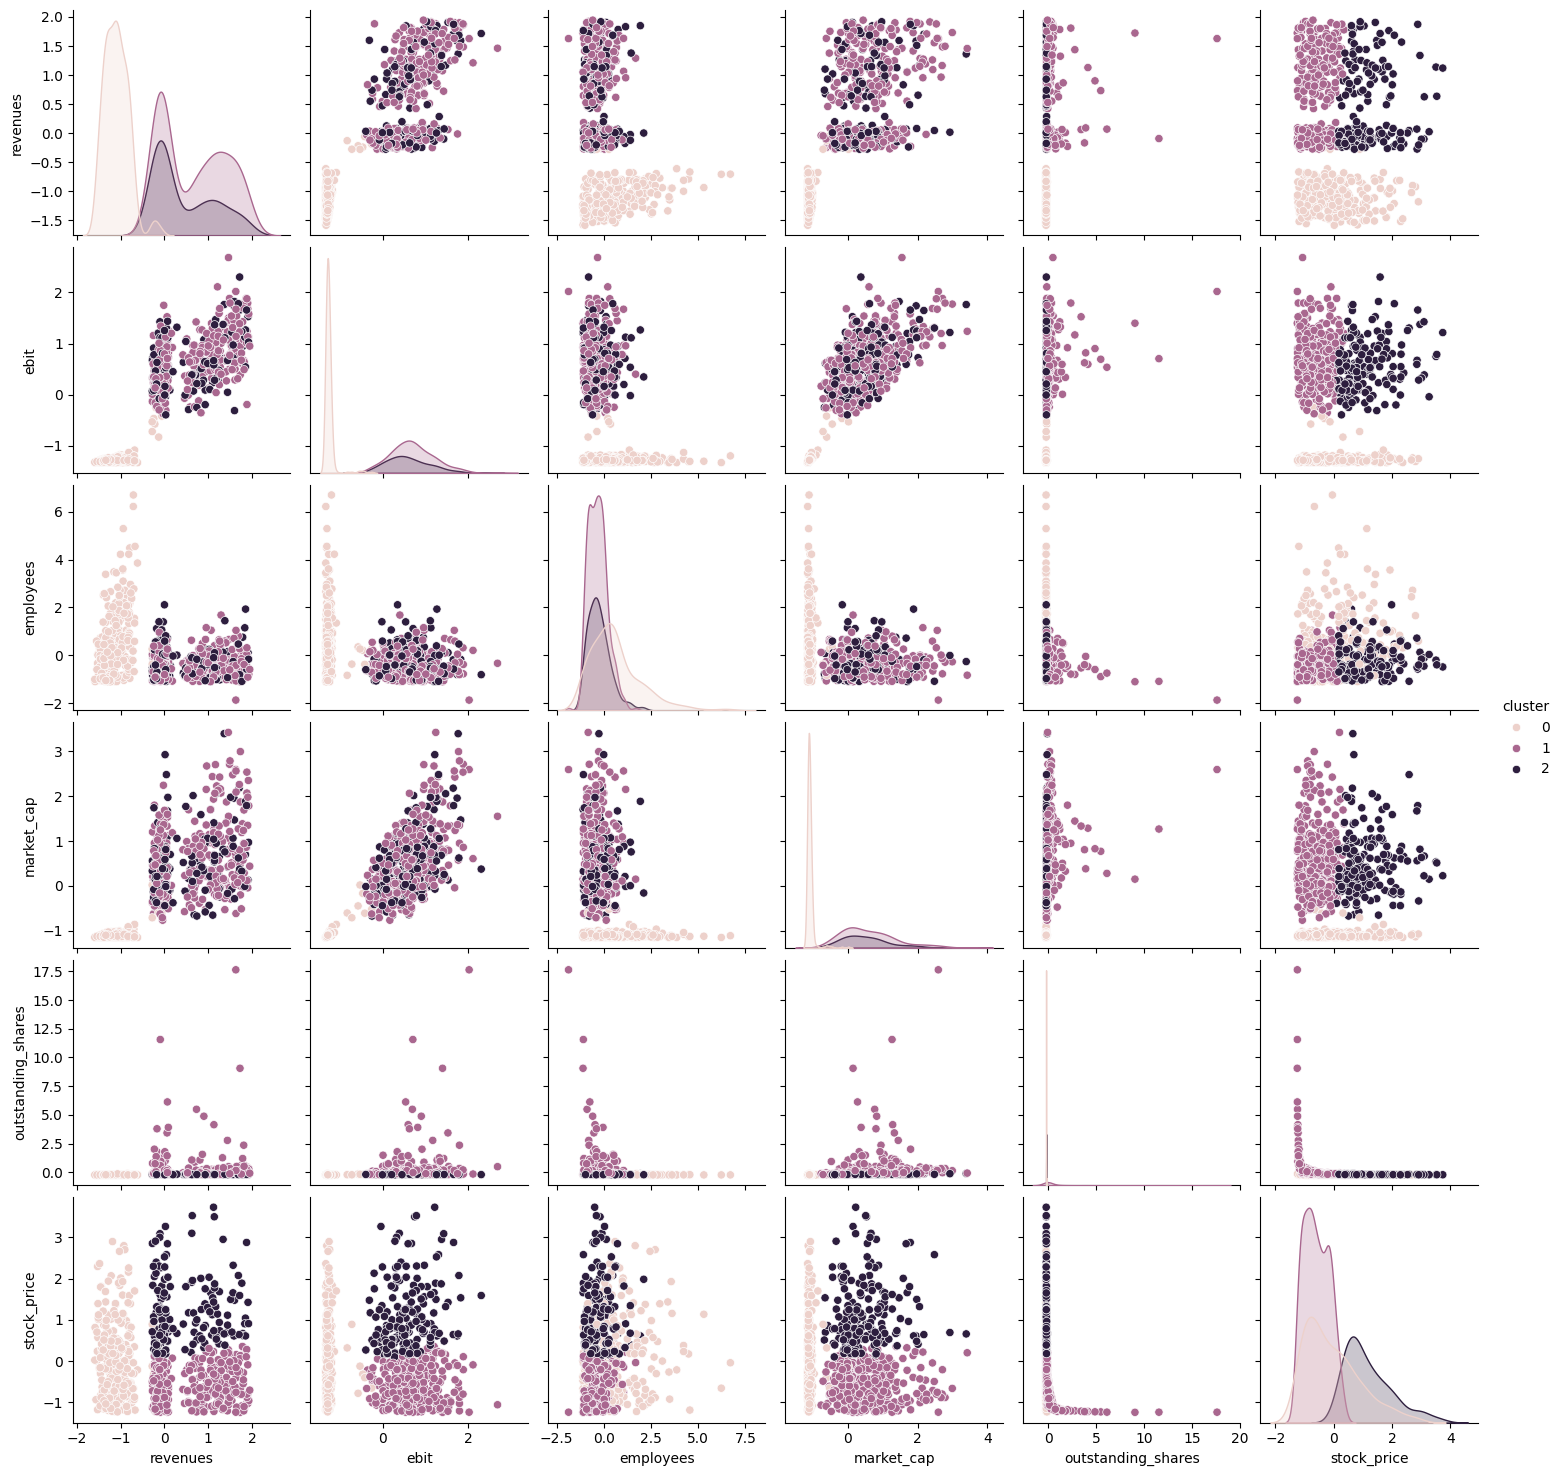

In [28]:
# Color the points according to their cluster assignment
sns.pairplot(norm_df, hue='cluster')
plt.show()

In [36]:
# Run k-means multiple times with k=3 and measure the silhouette score
# Store the best performing model in the variable best_model
from sklearn.metrics import silhouette_score

best_score = -1
best_model = None

for _ in range(1000):
    model = KMeans(n_clusters=3)
    model.fit(norm_df)
    labels = model.predict(norm_df)
    score = silhouette_score(norm_df, labels)
    if score > best_score:
        best_score = score
        best_model = model

# Print the results of the best performing model
print(best_model)
print(best_score)

# Create a new column in norm_df called 'cluster' that contains the cluster labels
norm_df['cluster'] = best_model.predict(norm_df)

KMeans(n_clusters=3)
0.44767853328318985


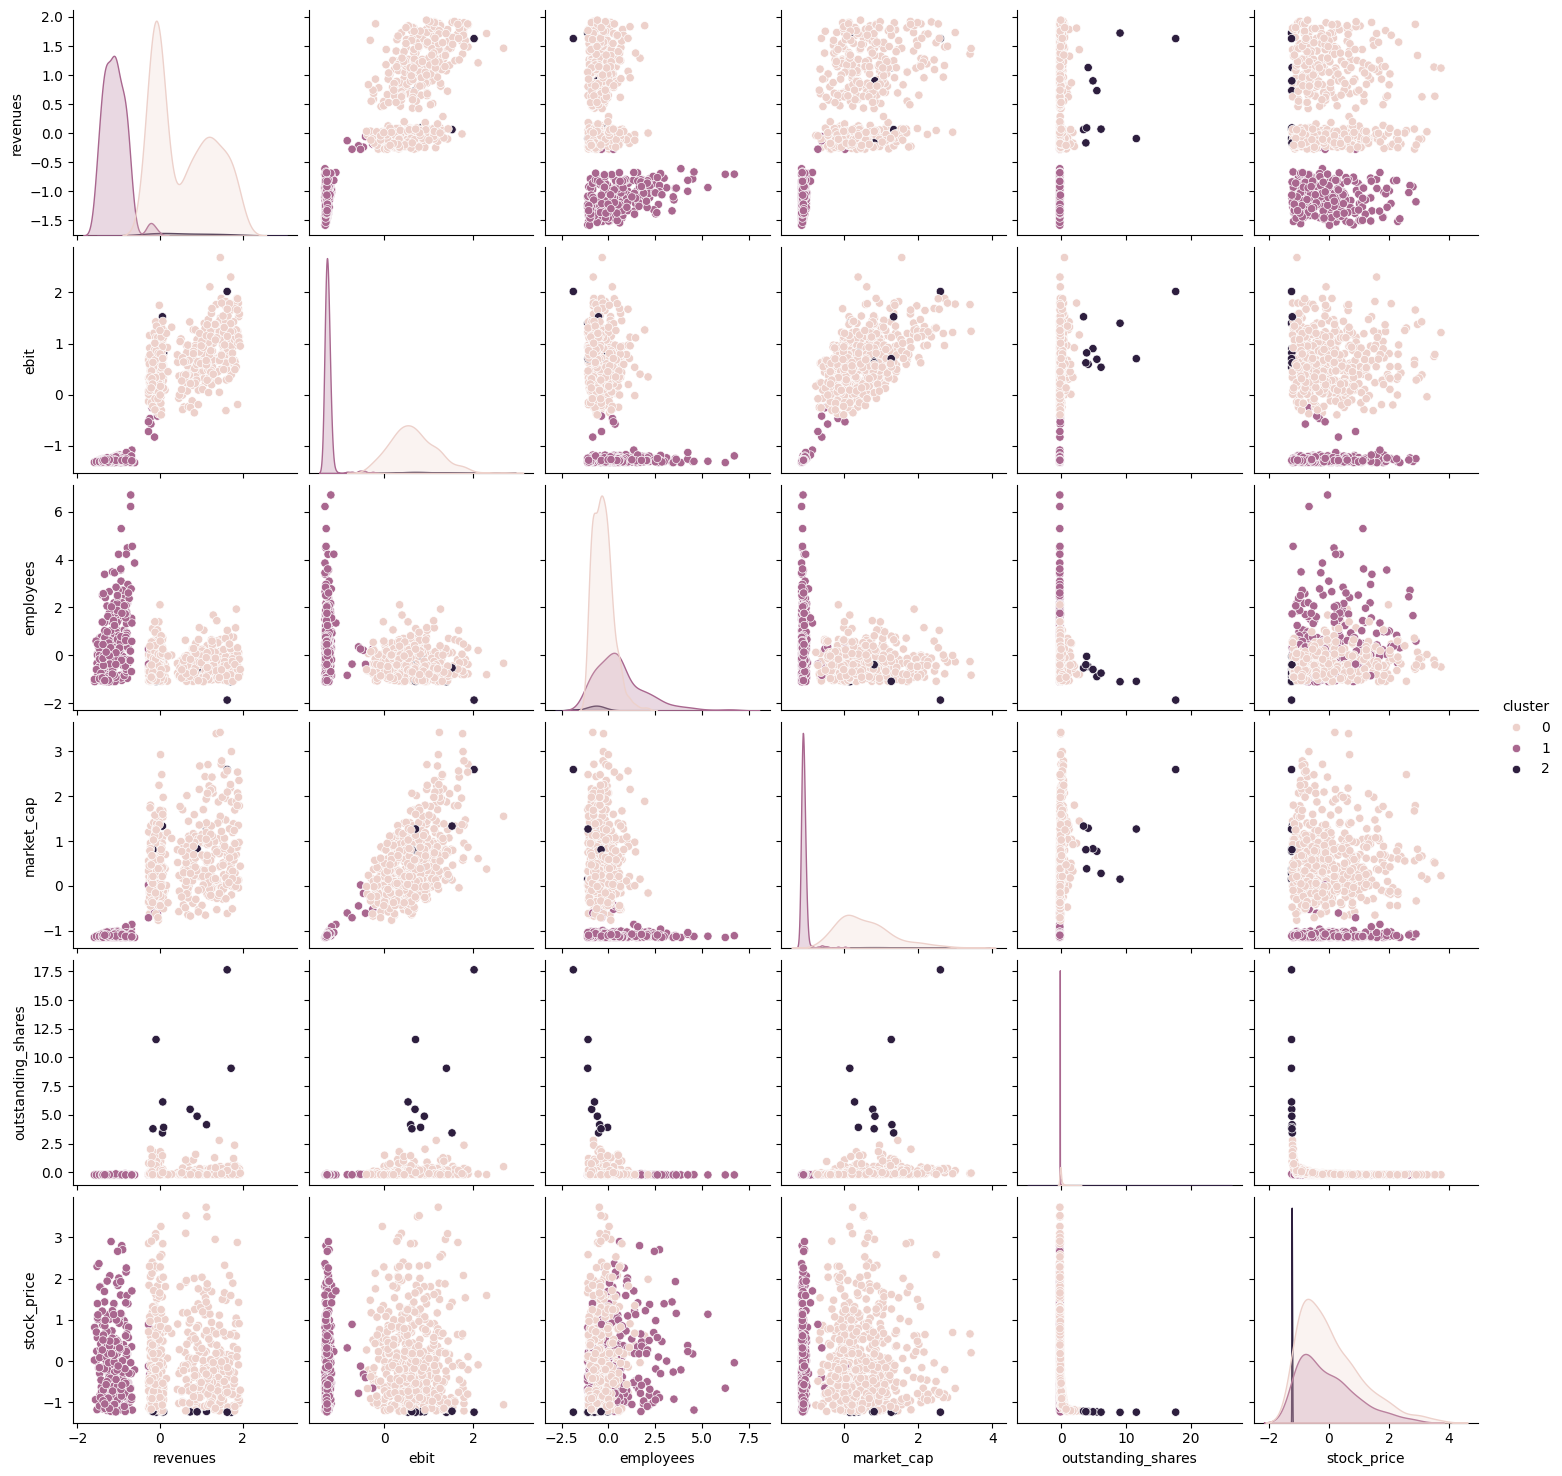

In [37]:
# Color the points according to their cluster assignment
sns.pairplot(norm_df, hue='cluster')
plt.show()

In [38]:
norm_df['industry'] = base_df['industry']

In [2]:
# # Color the points according to their cluster assignment
sns.pairplot(norm_df, hue='industry')
plt.show()

NameError: name 'sns' is not defined

In [21]:
norm_df

,revenues,ebit,employees,market_cap,outstanding_shares,stock_price,cluster,industry
0,1.811580,0.665493,-0.779110,1.691879,-0.130296,0.319272,1,technology
1,1.482894,1.882557,-0.776703,2.713172,-0.032706,-0.213498,1,technology
2,1.408150,1.172443,-0.372820,1.403335,-0.153999,0.680096,2,technology
3,1.088621,0.400277,0.228792,1.035059,-0.176256,1.121841,2,technology
4,0.953427,0.644462,-0.383080,0.945197,-0.092174,-0.443540,1,technology
...,...,...,...,...,...,...,...,...
744,-0.195398,0.310885,-0.897625,0.672198,0.056408,-0.915201,1,automobiles
745,0.193887,0.448478,-0.032523,-0.380243,-0.205048,0.784608,2,automobiles
746,0.066763,0.707421,0.257315,1.595774,-0.022653,-0.541362,1,automobiles
747,-0.179408,0.207668,-0.974650,-0.376752,-0.200095,0.387049,2,automobiles
